## Linear Regression Bike Sharing Case Study

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 

#### Actions Needed
Essentially, the company wants to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


## Step 1: Understanding the Data

Let us first import NumPy and Pandas and read the Bike Dataset

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [7]:
# Check the head of the dataset
shared_bike = pd.read_csv("day.csv")
shared_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
shared_bike.shape

(730, 16)

### Dataset info Showing there are no Null values in any column

In [8]:
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
shared_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Now we will perform the most important step - understanding the data.
We'll visualise our data using `matplotlib` and `seaborn`.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables
#### Pairplot Results
Based on the below results we can see temp and atemp are following the Linear Regression whereas Humidity and and Windspeed are scattered.

However other columns are categorical values so we will create a Box Plot for them and chech the relation with the cnt or Count

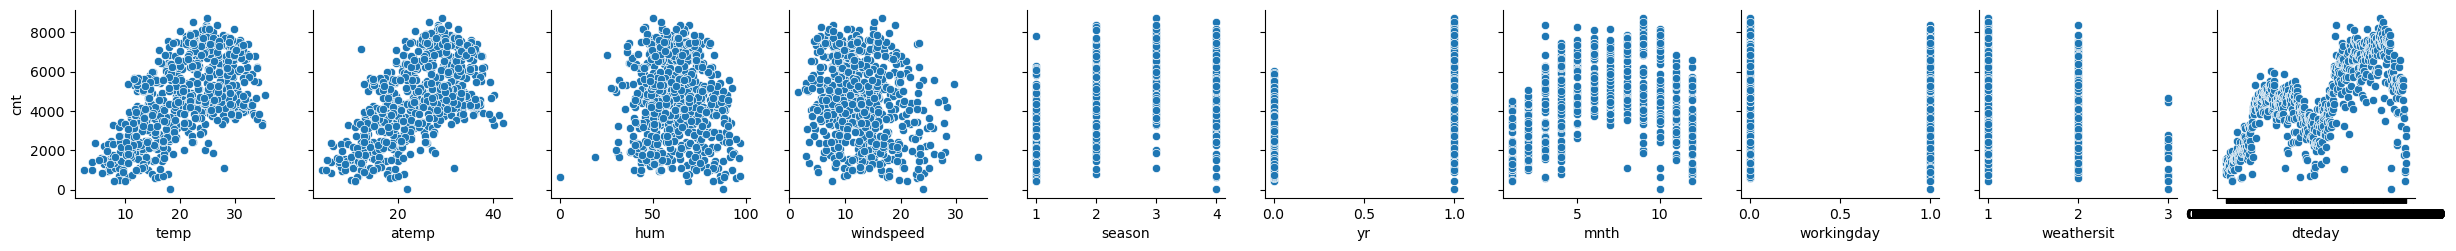

In [11]:
sns.pairplot(data=shared_bike,x_vars=['temp','atemp','hum','windspeed','season','yr','mnth','workingday','weathersit','dteday'],y_vars='cnt')



### Box Plot Results

##### Season Box Plot
- Fall season has max users followed by summer and winter has least users
##### Month Box Plot
- Month from November to February has lowest no of users.
##### WorkingDay Box Plot
- Working or Non-Working day doesn't make much difference.
##### WeatherSit
- Values 1 which signifies Clear, Few clouds, Partly cloudy, Partly cloudy has max users


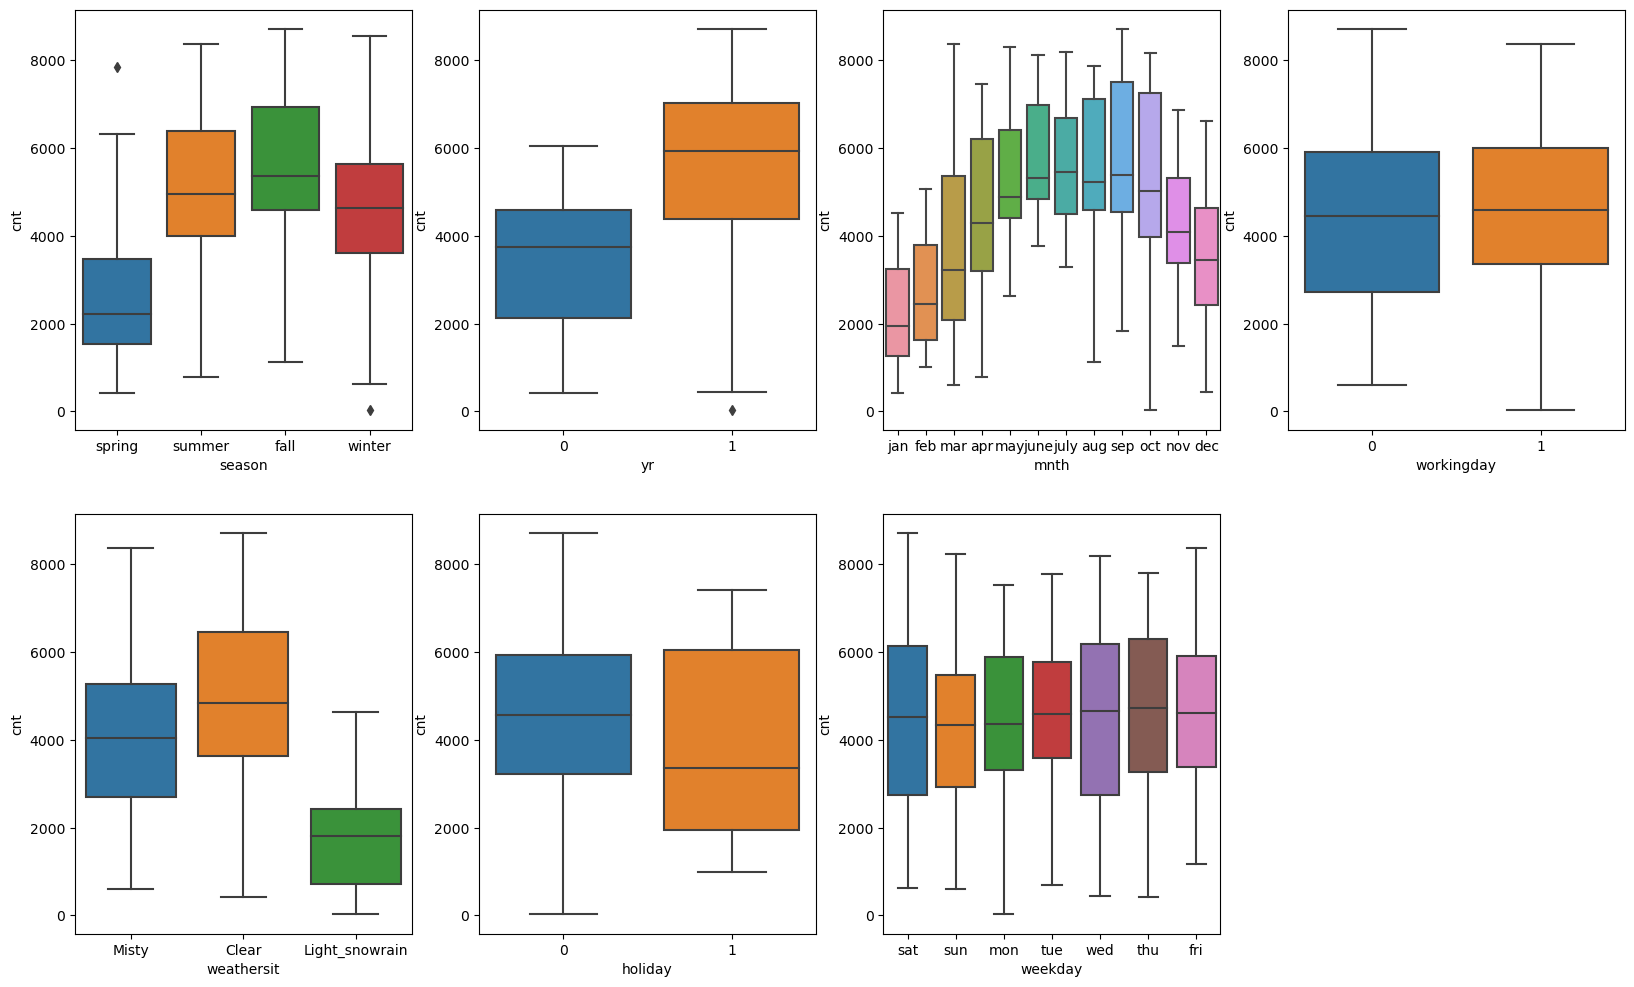

In [49]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = shared_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = shared_bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = shared_bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = shared_bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = shared_bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = shared_bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = shared_bike)
plt.show()

## Step 3: Data Preparation
### Converting the categorical values



In [13]:

shared_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
shared_bike.season = shared_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
shared_bike.mnth = shared_bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
shared_bike.weekday = shared_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
shared_bike.weathersit = shared_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


weathersit=pd.get_dummies(shared_bike.weathersit,drop_first=True)
seasons=pd.get_dummies(shared_bike.season,drop_first=True)
months=pd.get_dummies(shared_bike.mnth,drop_first=True)
weekdays=pd.get_dummies(shared_bike.weekday,drop_first=True)


shared_bike_df = pd.concat([shared_bike,weathersit,seasons,months,weekdays],axis=1)
shared_bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


#### Dropping Unnecessary Columns


In [14]:
shared_bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [15]:
shared_bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_snowrain,Misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets
- The first basic step for regression is performing a train-test split.
- We will not perform Scaling for this dataset since the range of the input values is comparable.
- Check the correlation coefficients to see which variables are highly correlated


In [16]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_bike_train, df_bike_test = train_test_split(shared_bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5: Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_bike_train[num_vars] = scaler.fit_transform(df_bike_train[num_vars])
df_bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_snowrain,Misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


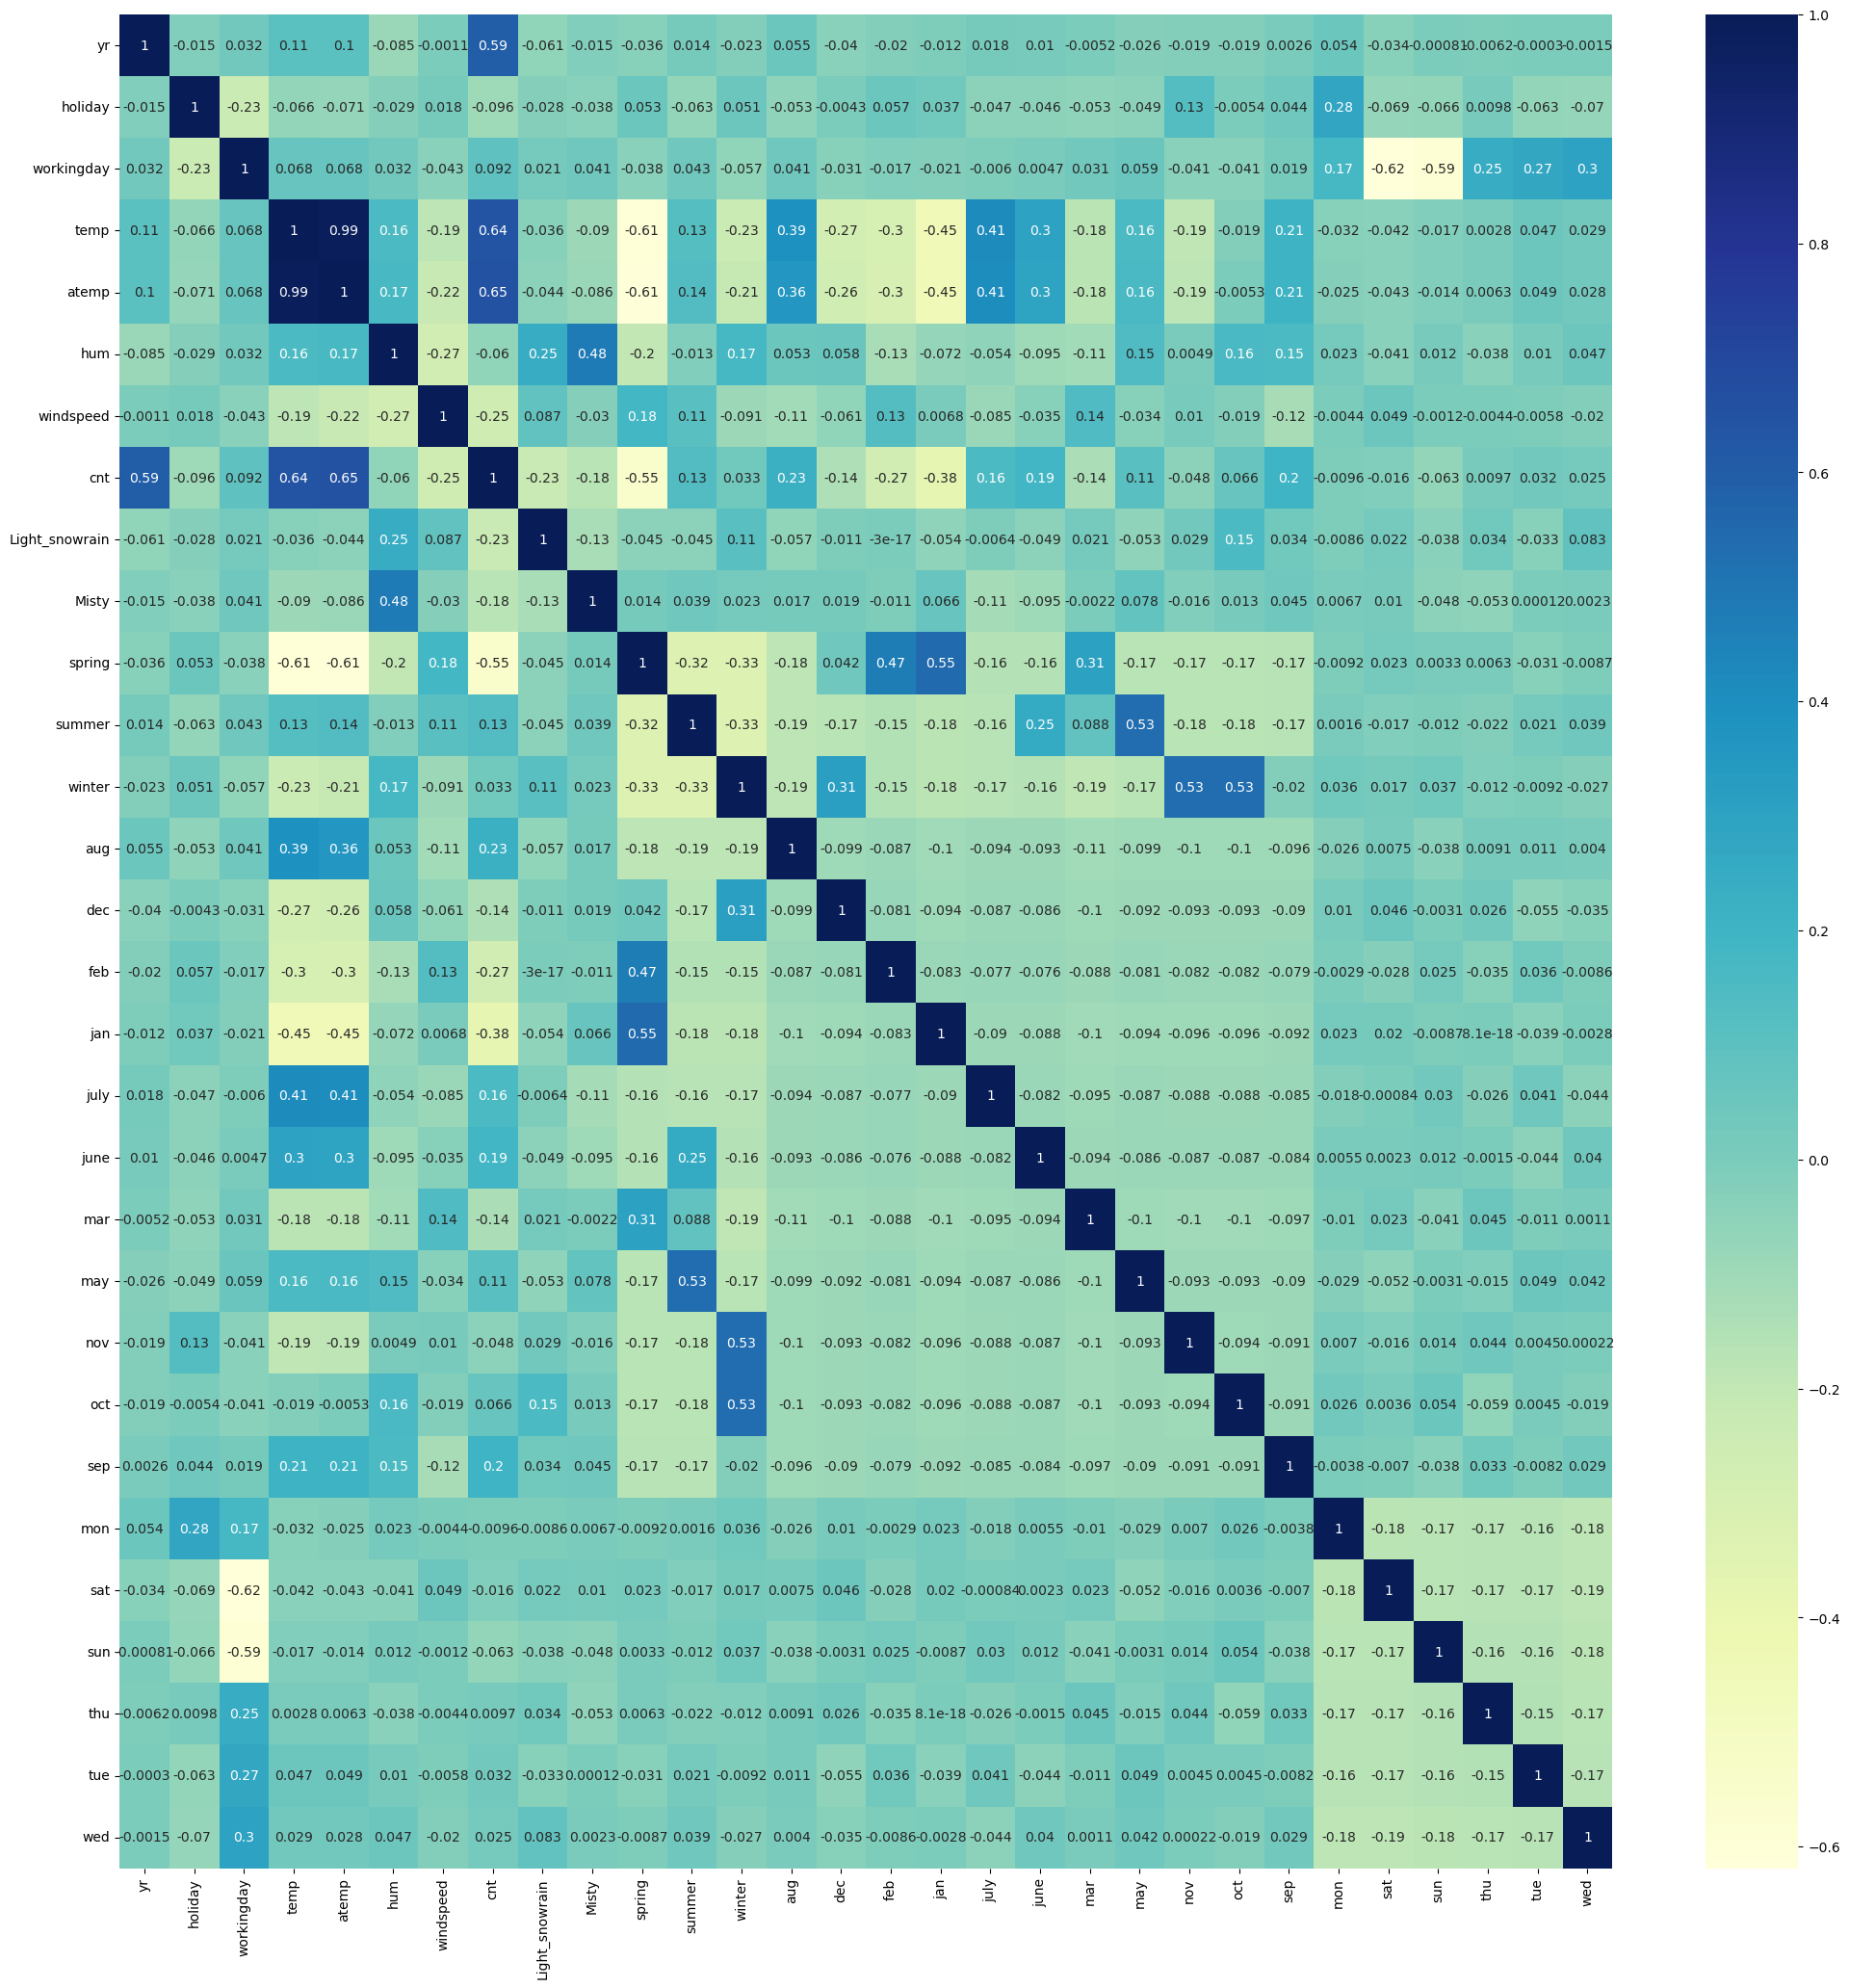

In [18]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Model Building Using Recursive feature elimination RFE.


### Dividing into X and Y sets for the model building


Now we will use `statsmodels` library to create a model. In `statsmodels`,we will explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [19]:
y_train = df_bike_train.pop('cnt')
X_train = df_bike_train

### RFE Implementation



In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', True, 1),
 ('mar', False, 16),
 ('may', False, 10),
 ('nov', False, 2),
 ('oct', False, 6),
 ('sep', False, 15),
 ('mon', False, 13),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 12),
 ('tue', False, 8),
 ('wed', False, 14)]

In [21]:
# Selected variable by RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light_snowrain', 'Misty', 'spring', 'winter', 'aug', 'july', 'june',
       'sat'],
      dtype='object')


In [22]:
# Columns rejected by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'dec', 'feb', 'jan', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [23]:
def VIF_Calculation(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [25]:
# Created dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,Light_snowrain,Misty,spring,winter,aug,july,june,sat
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,1,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,1,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,1,0,0,0,1


In [26]:
# Fucntion call to calculate VIF

VIF_Calculation(X_train_rfe)

,Features,VIF
4,hum,24.67
3,temp,21.91
2,workingday,5.19
5,windspeed,4.18
8,spring,2.62
7,Misty,2.24
9,winter,2.16
0,yr,2.07
13,sat,1.94
11,july,1.78


## Step 6 Linear Model Build


In [27]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          5.34e-190
Time:                        07:51:00   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.033      8.

In [28]:
# Now we will start removing the variables which are not relevant
# Pvalues are mostly significant which means we need to check the VIF as a second step

X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
VIF_Calculation(X_train_new)

,Features,VIF
3,temp,9.37
2,workingday,5.00
4,windspeed,4.18
0,yr,2.06
12,sat,1.91
7,spring,1.90
9,aug,1.66
10,july,1.66
8,winter,1.65
6,Misty,1.56


In [29]:
# Building model again after removing Hum or Humidity variable

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          4.66e-187
Time:                        07:51:07   Log-Likelihood:                 504.11
No. Observations:                 510   AIC:                            -980.2
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1944      0.026      7.

In [30]:
# Dropping June variable due to high p-value
X_train_new = X_train_new.drop(['june'], axis = 1)

# Run the function to calculate VIF for the new model
VIF_Calculation(X_train_new)

,Features,VIF
3,temp,7.58
2,workingday,4.98
4,windspeed,4.16
0,yr,2.06
11,sat,1.91
7,spring,1.88
8,winter,1.55
6,Misty,1.54
9,aug,1.45
10,july,1.45


In [60]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          5.88e-187
Time:                        11:47:19   Log-Likelihood:                 501.08
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2004      0.026      7.

In [31]:
# Dropping holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
VIF_Calculation(X_train_new)

,Features,VIF
2,temp,7.21
1,workingday,4.47
3,windspeed,4.14
0,yr,2.06
6,spring,1.82
10,sat,1.79
5,Misty,1.54
7,winter,1.52
8,aug,1.45
9,july,1.44


In [62]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.41e-187
Time:                        11:49:39   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1932      0.026      7.

In [81]:
# Dropping aug variable as it has high p-value
X_train_new = X_train_new.drop(['aug'], axis = 1)

# Run the function to calculate VIF for the new model
VIF_Calculation(X_train_new)

,Features,VIF
2,temp,6.12
1,workingday,4.47
3,windspeed,4.07
0,yr,2.06
6,spring,1.81
9,sat,1.79
5,Misty,1.54
7,winter,1.45
8,july,1.32
4,Light_snowrain,1.08


In [32]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.41e-187
Time:                        07:51:20   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1932      0.026      7.

In [33]:
# Dropping aug variable as it has high p-value
X_train_new_1 = X_train_new.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
VIF_Calculation(X_train_new_1)

,Features,VIF
2,windspeed,3.44
1,workingday,3.26
0,yr,1.90
5,spring,1.62
9,sat,1.57
4,Misty,1.52
6,winter,1.52
7,aug,1.23
8,july,1.16
3,Light_snowrain,1.08


In [34]:
X_train_lm_6 = sm.add_constant(X_train_new_1)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          1.42e-145
Time:                        07:51:29   Log-Likelihood:                 397.60
No. Observations:                 510   AIC:                            -773.2
Df Residuals:                     499   BIC:                            -726.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5162      0.018     28.

#### Removing the temp value has brought down the R value significantly from 0.83 to 0.75
#### Although VIF value of temp is >5 but I think it is better to keep the variable so we will use lr_5 as final model

In [35]:
lr_5.params

const             0.193213
yr                0.233996
workingday        0.054869
temp              0.496912
windspeed        -0.153866
Light_snowrain   -0.287026
Misty            -0.080376
spring           -0.111360
winter            0.044089
aug              -0.043310
july             -0.096462
sat               0.067761
dtype: float64

### Step 7 Residual Analysis of the train data and validation

In [36]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

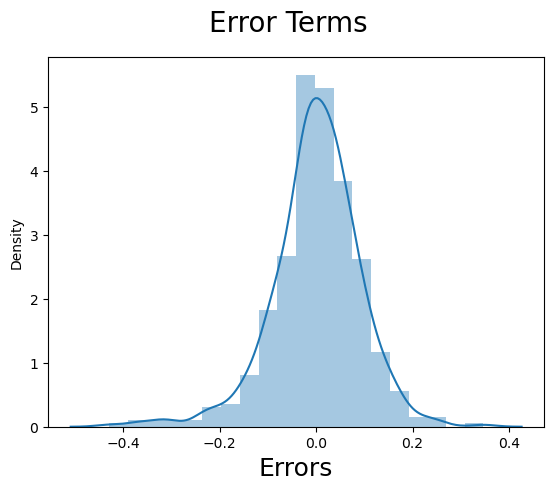

In [87]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Step 8 Final Model Predicition on the Test Data

In [37]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_bike_test[num_vars] = scaler.transform(df_bike_test[num_vars])
df_bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_snowrain,Misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Dividing the data into Y and X
y_test = df_bike_test.pop('cnt')
X_test = df_bike_test

In [39]:
col1 = X_train_new.columns

X_test = X_test[col1]

#Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [40]:
y_pred = lr_5.predict(X_test_lm_5)

In [41]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.809

### Step 9 Predicition  vs Test Data

Text(0, 0.5, 'y_pred')

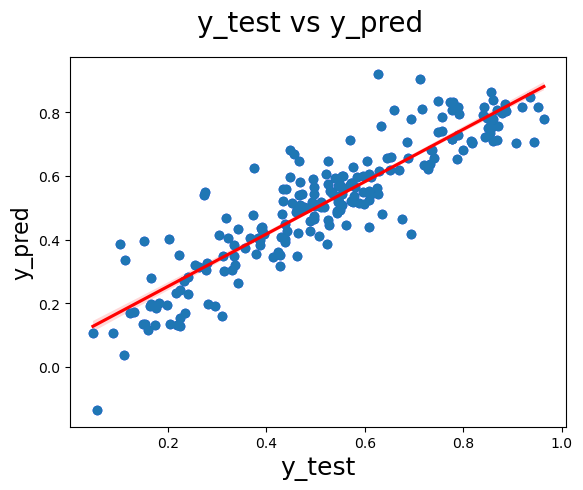

In [44]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [50]:
round(lr_5.params,4)

const             0.1932
yr                0.2340
workingday        0.0549
temp              0.4969
windspeed        -0.1539
Light_snowrain   -0.2870
Misty            -0.0804
spring           -0.1114
winter            0.0441
aug              -0.0433
july             -0.0965
sat               0.0678
dtype: float64

## Conclusion
#### Train Dataset R2 Value - 0.836
#### Test Dataset R2 Value - 0.809

Based on the above values of R2 we can say that model is working fine for Train and Test Data. P values are also significant and the value of cnt which is Count of Bikes used depends on yr,workingday,temp,windspeed,Light_snowrain,Misty,spring ,winter, aug, july,sat

